# The Music of the Sphere: Fourier Series Representation of the Horizon-scale Potential

*Phil Marshall, Laurence Perreault Levasseur and Roger Blandford, August-October 2015*

In this notebook we look at some simulated potential fields, and predict the CMB temperature map from them.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
import beatbox


1


# 1. Generating and Visualizing a 3D Potential

Our plan is to use a simple Fourier series, with terms lying within some sphere in k-space, to represent the potential on horizon scales. Let's instantiate such a "beatbox" universe and generate a Gaussian random potential field in it, using a simple inflation model to generate a power spectrum and then populate the covariance matrix.

In [3]:
We = beatbox.Universe()
We.generate_a_random_potential_field(truncated_nmax=We.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)

Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0002829


beatbox/universe.py:546: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*1000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Now, let's visualize the 3D potential field, with `yt`. We're trying to make a plot like [this one](http://yt-project.org/doc/_images/vr_sample.jpg), as shown in the [volume rendering tutorial](http://yt-project.org/doc/visualizing/volume_rendering.html). [This `gist` (from Sam Skillman)](https://gist.github.com/samskillman/0e574d1a4f67d3a3b1b1) uses a development version of `yt` to do the rendering, but does show how to use `yt` data structures.

In [ ]:
# !pip install --upgrade Cython
# !pip install --upgrade yt


In [4]:
import yt 

# yt.visualization.color_maps.show_colormaps()


yt : [INFO     ] 2016-02-17 00:44:56,747 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 00:44:56,747 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 00:44:56,748 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 00:44:56,749 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 00:44:56,750 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 00:44:56,796 Loading field plugins.
yt : [INFO     ] 2016-02-17 00:44:56,797 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,797 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,798 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,799 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,801 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 00:44:56,802 Loaded geometric (112 ne

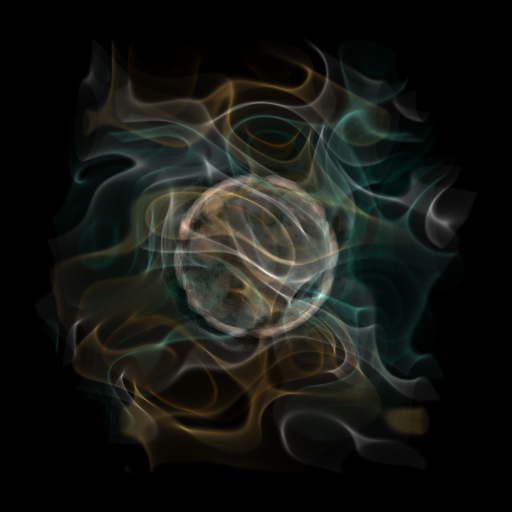

In [111]:
We.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=1)

#from IPython.display import Image
#Image('test1.png',width=400)

In [104]:
from IPython.core.display import Image
Image(url='scratch/opac_phi3Ddomain.png',width=600)

In [ ]:
# !pip install --upgrade images2gif
# !pip install --upgrade PIL

In [115]:
We.show_potential_from_all_angles_with_yt(output='scratch/phi5.gif')

1
Making frame

yt : [INFO     ] 2016-02-17 01:11:15,889 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:15,890 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:15,891 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:15,892 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:15,893 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:15,939 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:15,940 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:15,940 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:15,941 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:15,942 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:15,943 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:15,944 Loaded geometric (112 ne

 0 :  frames/000 at viewing angle 0.785398163397
Making frame

yt : [INFO     ] 2016-02-17 01:11:21,024 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:21,025 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:21,026 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:21,027 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:21,028 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:21,059 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:21,059 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:21,060 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:21,061 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:21,063 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:21,064 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:21,065 Loaded geometric (112 ne

 1 :  frames/001 at viewing angle 0.829031394697
Making frame

yt : [INFO     ] 2016-02-17 01:11:26,277 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:26,278 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:26,279 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:26,281 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:26,283 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:26,322 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:26,323 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:26,323 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:26,324 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:26,326 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:26,328 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:26,329 Loaded geometric (112 ne

 2 :  frames/002 at viewing angle 0.872664625997
Making frame

yt : [INFO     ] 2016-02-17 01:11:30,450 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:30,451 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:30,452 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:30,453 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:30,454 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:30,490 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:30,491 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:30,492 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:30,493 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:30,495 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:30,496 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:30,496 Loaded geometric (112 ne

 3 :  frames/003 at viewing angle 0.916297857297
Making frame

yt : [INFO     ] 2016-02-17 01:11:34,427 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:34,427 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:34,429 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:34,429 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:34,430 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:34,465 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:34,465 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:34,466 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:34,466 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:34,468 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:34,469 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:34,470 Loaded geometric (112 ne

 4 :  frames/004 at viewing angle 0.959931088597
Making frame

yt : [INFO     ] 2016-02-17 01:11:38,783 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:38,784 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:38,785 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:38,786 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:38,787 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:38,818 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:38,819 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:38,819 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:38,820 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:38,821 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:38,822 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:38,823 Loaded geometric (112 ne

 5 :  frames/005 at viewing angle 1.0035643199
Making frame

yt : [INFO     ] 2016-02-17 01:11:42,854 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:42,854 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:42,855 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:42,856 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:42,857 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:42,889 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:42,889 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:42,890 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:42,890 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:42,892 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:42,893 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:42,893 Loaded geometric (112 ne

 6 :  frames/006 at viewing angle 1.0471975512
Making frame

yt : [INFO     ] 2016-02-17 01:11:47,532 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:47,533 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:47,534 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:47,536 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:47,537 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:47,567 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:47,568 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:47,569 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:47,570 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:47,571 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:47,573 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:47,573 Loaded geometric (112 ne

 7 :  frames/007 at viewing angle 1.0908307825
Making frame

yt : [INFO     ] 2016-02-17 01:11:51,886 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:51,887 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:51,888 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:51,889 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:51,890 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:51,923 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:51,924 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:51,924 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:51,925 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:51,926 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:51,928 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:51,929 Loaded geometric (112 ne

 8 :  frames/008 at viewing angle 1.1344640138
Making frame

yt : [INFO     ] 2016-02-17 01:11:56,487 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:11:56,487 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:11:56,489 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:11:56,490 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:11:56,491 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:11:56,518 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:11:56,519 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:11:56,520 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:11:56,520 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:11:56,521 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:11:56,522 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:11:56,522 Loaded geometric (112 ne

 9 :  frames/009 at viewing angle 1.1780972451
Making frame

yt : [INFO     ] 2016-02-17 01:12:00,522 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:00,523 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:00,524 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:00,525 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:00,526 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:00,558 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:00,558 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:00,559 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:00,559 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:00,560 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:00,562 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:00,562 Loaded geometric (112 ne

 10 :  frames/010 at viewing angle 1.2217304764
Making frame

yt : [INFO     ] 2016-02-17 01:12:04,693 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:04,694 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:04,695 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:04,696 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:04,697 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:04,748 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:04,749 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:04,750 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:04,750 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:04,752 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:04,753 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:04,754 Loaded geometric (112 ne

 11 :  frames/011 at viewing angle 1.2653637077
Making frame

yt : [INFO     ] 2016-02-17 01:12:08,962 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:08,962 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:08,963 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:08,963 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:08,964 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:08,998 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:08,999 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:08,999 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:09,000 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:09,001 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:09,002 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:09,003 Loaded geometric (112 ne

 12 :  frames/012 at viewing angle 1.308996939
Making frame

yt : [INFO     ] 2016-02-17 01:12:12,841 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:12,842 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:12,842 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:12,843 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:12,844 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:12,871 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:12,872 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:12,872 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:12,873 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:12,874 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:12,874 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:12,875 Loaded geometric (112 ne

 13 :  frames/013 at viewing angle 1.3526301703
Making frame

yt : [INFO     ] 2016-02-17 01:12:16,608 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:16,608 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:16,609 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:16,609 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:16,610 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:16,636 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:16,636 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:16,637 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:16,637 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:16,638 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:16,639 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:16,639 Loaded geometric (112 ne

 14 :  frames/014 at viewing angle 1.3962634016
Making frame

yt : [INFO     ] 2016-02-17 01:12:20,358 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:20,358 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:20,359 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:20,359 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:20,360 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:20,387 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:20,388 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:20,388 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:20,388 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:20,390 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:20,390 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:20,391 Loaded geometric (112 ne

 15 :  frames/015 at viewing angle 1.4398966329
Making frame

yt : [INFO     ] 2016-02-17 01:12:24,182 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:24,182 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:24,183 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:24,184 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:24,184 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:24,210 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:24,210 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:24,211 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:24,211 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:24,212 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:24,213 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:24,214 Loaded geometric (112 ne

 16 :  frames/016 at viewing angle 1.4835298642
Making frame

yt : [INFO     ] 2016-02-17 01:12:27,883 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:27,884 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:27,884 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:27,885 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:27,886 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:27,912 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:27,912 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:27,913 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:27,913 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:27,914 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:27,915 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:27,916 Loaded geometric (112 ne

 17 :  frames/017 at viewing angle 1.5271630955
Making frame

yt : [INFO     ] 2016-02-17 01:12:31,457 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:31,457 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:31,458 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:31,459 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:31,460 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:31,492 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:31,493 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:31,493 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:31,494 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:31,495 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:31,496 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:31,497 Loaded geometric (112 ne

 18 :  frames/018 at viewing angle 1.57079632679
Making frame

yt : [INFO     ] 2016-02-17 01:12:35,070 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:35,070 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:35,071 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:35,071 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:35,072 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:35,102 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:35,103 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:35,104 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:35,104 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:35,105 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:35,106 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:35,107 Loaded geometric (112 ne

 19 :  frames/019 at viewing angle 1.61442955809
Making frame

yt : [INFO     ] 2016-02-17 01:12:39,396 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:39,396 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:39,397 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:39,398 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:39,398 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:39,424 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:39,424 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:39,425 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:39,425 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:39,426 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:39,427 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:39,428 Loaded geometric (112 ne

 20 :  frames/020 at viewing angle 1.65806278939
Making frame

yt : [INFO     ] 2016-02-17 01:12:43,392 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:43,393 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:43,393 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:43,394 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:43,395 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:43,434 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:43,434 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:43,435 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:43,435 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:43,436 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:43,437 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:43,438 Loaded geometric (112 ne

 21 :  frames/021 at viewing angle 1.70169602069
Making frame

yt : [INFO     ] 2016-02-17 01:12:47,245 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:47,246 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:47,247 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:47,248 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:47,249 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:47,278 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:47,278 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:47,279 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:47,279 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:47,280 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:47,281 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:47,282 Loaded geometric (112 ne

 22 :  frames/022 at viewing angle 1.74532925199
Making frame

yt : [INFO     ] 2016-02-17 01:12:51,457 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:51,459 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:51,461 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:51,462 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:51,463 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:51,502 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:51,503 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:51,503 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:51,504 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:51,506 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:51,507 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:51,508 Loaded geometric (112 ne

 23 :  frames/023 at viewing angle 1.78896248329
Making frame

yt : [INFO     ] 2016-02-17 01:12:55,288 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:55,288 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:55,289 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:55,290 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:55,290 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:55,481 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:55,481 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:55,482 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:55,482 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:55,483 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:55,485 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:55,485 Loaded geometric (112 ne

 24 :  frames/024 at viewing angle 1.83259571459
Making frame

yt : [INFO     ] 2016-02-17 01:12:59,218 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:12:59,219 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:12:59,220 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:12:59,221 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:12:59,222 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:12:59,255 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:12:59,256 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:12:59,256 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:12:59,257 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:12:59,258 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:12:59,259 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:12:59,260 Loaded geometric (112 ne

 25 :  frames/025 at viewing angle 1.87622894589
Making frame

yt : [INFO     ] 2016-02-17 01:13:03,173 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:03,174 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:03,175 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:03,175 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:03,176 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:03,207 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:03,208 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:03,208 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:03,209 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:03,210 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:03,211 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:03,212 Loaded geometric (112 ne

 26 :  frames/026 at viewing angle 1.91986217719
Making frame

yt : [INFO     ] 2016-02-17 01:13:07,049 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:07,050 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:07,050 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:07,051 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:07,052 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:07,087 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:07,087 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:07,088 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:07,088 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:07,089 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:07,090 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:07,091 Loaded geometric (112 ne

 27 :  frames/027 at viewing angle 1.96349540849
Making frame

yt : [INFO     ] 2016-02-17 01:13:10,891 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:10,891 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:10,892 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:10,893 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:10,894 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:10,926 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:10,926 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:10,927 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:10,927 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:10,928 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:10,929 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:10,930 Loaded geometric (112 ne

 28 :  frames/028 at viewing angle 2.00712863979
Making frame

yt : [INFO     ] 2016-02-17 01:13:14,795 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:14,795 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:14,796 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:14,797 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:14,797 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:14,825 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:14,825 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:14,826 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:14,826 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:14,827 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:14,828 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:14,829 Loaded geometric (112 ne

 29 :  frames/029 at viewing angle 2.05076187109
Making frame

yt : [INFO     ] 2016-02-17 01:13:18,755 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:18,755 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:18,756 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:18,756 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:18,757 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:18,785 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:18,786 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:18,786 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:18,786 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:18,787 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:18,788 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:18,789 Loaded geometric (112 ne

 30 :  frames/030 at viewing angle 2.09439510239
Making frame

yt : [INFO     ] 2016-02-17 01:13:22,663 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:22,663 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:22,664 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:22,665 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:22,665 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:22,694 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:22,695 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:22,695 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:22,696 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:22,696 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:22,697 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:22,698 Loaded geometric (112 ne

 31 :  frames/031 at viewing angle 2.13802833369
Making frame

yt : [INFO     ] 2016-02-17 01:13:26,764 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:26,764 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:26,765 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:26,766 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:26,766 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:26,794 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:26,794 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:26,795 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:26,795 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:26,796 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:26,797 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:26,797 Loaded geometric (112 ne

 32 :  frames/032 at viewing angle 2.18166156499
Making frame

yt : [INFO     ] 2016-02-17 01:13:30,871 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:30,872 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:30,873 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:30,874 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:30,875 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:30,906 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:30,906 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:30,907 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:30,908 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:30,909 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:30,910 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:30,911 Loaded geometric (112 ne

 33 :  frames/033 at viewing angle 2.22529479629
Making frame

yt : [INFO     ] 2016-02-17 01:13:35,194 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:35,194 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:35,195 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:35,196 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:35,196 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:35,228 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:35,229 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:35,229 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:35,230 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:35,231 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:35,233 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:35,234 Loaded geometric (112 ne

 34 :  frames/034 at viewing angle 2.26892802759
Making frame

yt : [INFO     ] 2016-02-17 01:13:40,147 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 01:13:40,148 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 01:13:40,149 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 01:13:40,150 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 01:13:40,151 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 01:13:40,212 Loading field plugins.
yt : [INFO     ] 2016-02-17 01:13:40,213 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 01:13:40,214 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 01:13:40,215 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 01:13:40,216 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 01:13:40,217 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 01:13:40,219 Loaded geometric (112 ne

 35 :  frames/035 at viewing angle 2.31256125889


In [116]:
from IPython.core.display import Image
Image(url='scratch/phi5.gif',width=500)


# 2. Predicting the CMB Temperature Map

When we get to doing the inverse problem, we'll be sampling from the posterior PDF for the potential coefficients $f_n$, and will need to check that these models are indeed plausible. The first model check we will do will be visual, and will involve making mock CMB temperature maps for our model potentials (see [issue 8](https://github.com/rogerblandford/Music/issues/8)).

So, let's convert the Fourier coefficients `fn` into `alm`'s, using the appropriate response matrix:

Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0002435
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


beatbox/universe.py:546: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*1000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


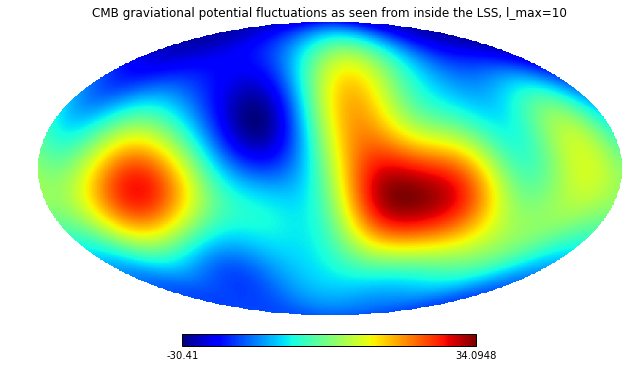

In [117]:
#Simulation with lmax=10
We=beatbox.Universe()
We.truncated_nmax=3
We.truncated_lmax=10
We.generate_a_random_potential_field(truncated_nmax=We.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We.transform_3D_potential_into_alm(truncated_nmax=3, truncated_nmin=1,truncated_lmax=10, truncated_lmin=0,usedefault=0)
We.show_CMB_T_map(from_perspective_of="observer")

yt : [INFO     ] 2016-02-17 12:21:20,617 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-17 12:21:20,619 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-17 12:21:20,620 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-17 12:21:20,622 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-17 12:21:20,623 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-17 12:21:20,699 Loading field plugins.
yt : [INFO     ] 2016-02-17 12:21:20,701 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,702 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,704 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,705 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,706 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-17 12:21:20,707 Loaded geometric (112 ne

1



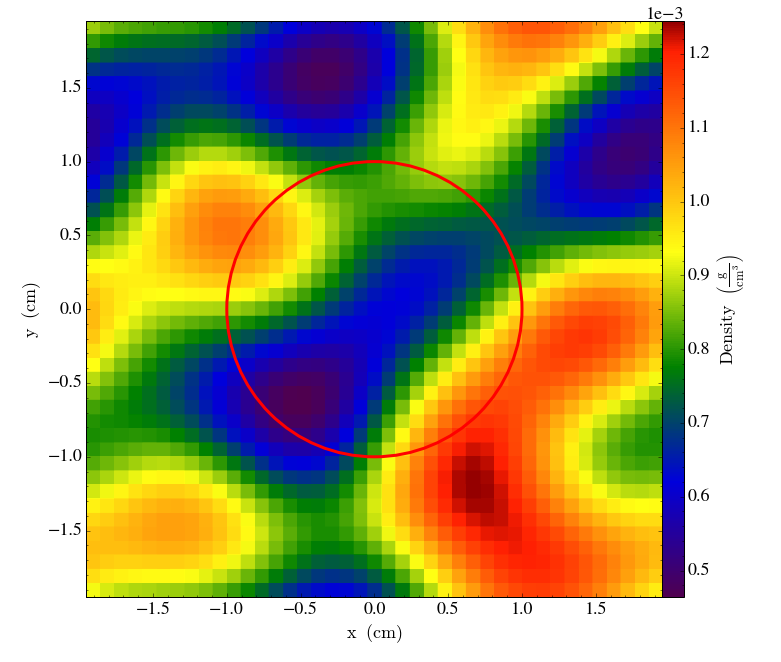

yt : [INFO     ] 2016-02-17 12:21:25,867 Saving plot phi_Slice_z_density.png


In [128]:
import yt
We.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

This shows a simulation that included from the dipole up to lmax=10. Looks right to me. 


When plotting up to lmax=30 it looks like it behave like we should expect, too.

Generated  924  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0003021
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


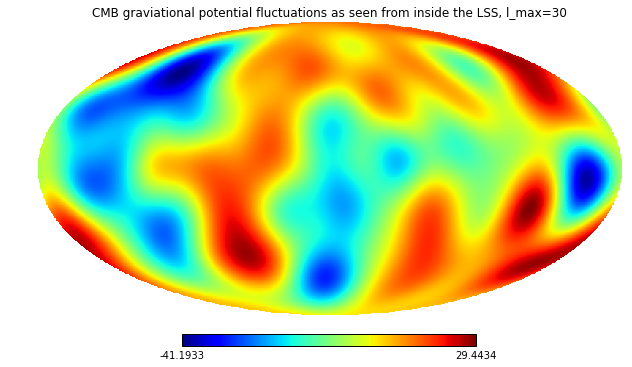

In [14]:
#Simulation with truncated_lmax=30
We2 = beatbox.Universe()
We2.truncated_nmax=6
We2.truncated_lmax=30
We2.generate_a_random_potential_field(truncated_nmax=We2.truncated_nmax, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We2.transform_3D_potential_into_alm(truncated_nmax=6, truncated_nmin=1,truncated_lmax=30, truncated_lmin=1,usedefault=0)
We2.show_CMB_T_map(from_perspective_of="observer")


yt : [INFO     ] 2016-02-16 13:48:55,051 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-16 13:48:55,051 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-16 13:48:55,052 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-16 13:48:55,053 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-16 13:48:55,054 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-16 13:48:55,074 Loading field plugins.
yt : [INFO     ] 2016-02-16 13:48:55,075 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-16 13:48:55,076 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-16 13:48:55,076 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-16 13:48:55,077 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-16 13:48:55,079 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-16 13:48:55,079 Loaded geometric (112 ne


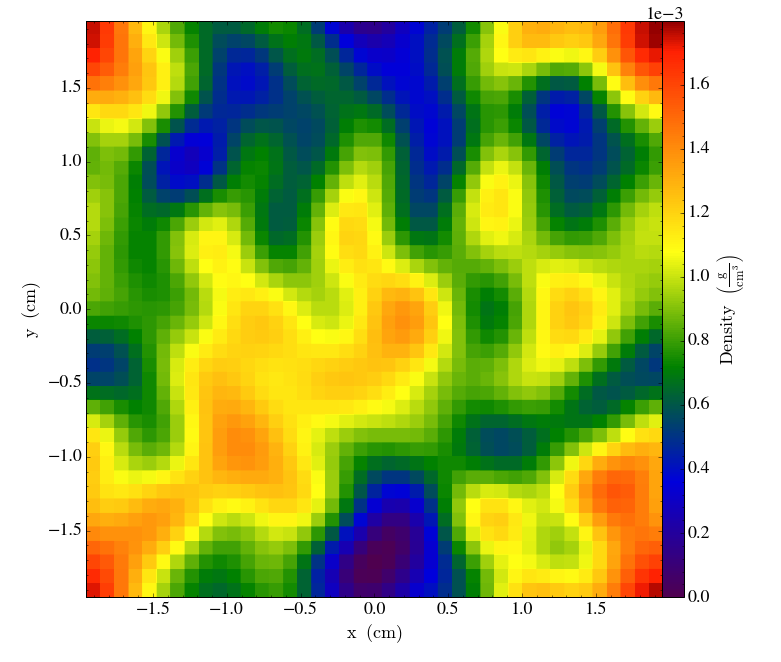

yt : [INFO     ] 2016-02-16 13:48:59,268 Saving plot phi_Slice_z_density.png


In [15]:
import yt
We2.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

Generated  32  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.0002534
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


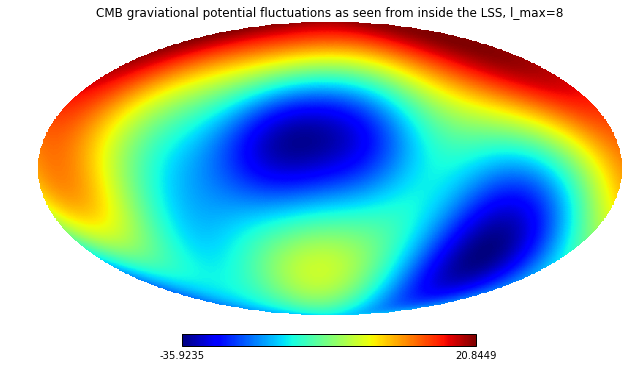

In [23]:
#Make another universe with truncated_lmax=8
We3 = beatbox.Universe()
We3.truncated_nmax=2
We3.truncated_lmax=8
We3.generate_a_random_potential_field(truncated_nmax=2, truncated_nmin=1, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We3.transform_3D_potential_into_alm(truncated_nmax=2, truncated_nmin=1,truncated_lmax=8, truncated_lmin=0,usedefault=0)
We3.show_CMB_T_map(from_perspective_of="observer")

yt : [INFO     ] 2016-02-16 13:49:53,517 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-16 13:49:53,518 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-02-16 13:49:53,519 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-02-16 13:49:53,519 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-02-16 13:49:53,520 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-16 13:49:53,542 Loading field plugins.
yt : [INFO     ] 2016-02-16 13:49:53,542 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-16 13:49:53,543 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-16 13:49:53,545 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-16 13:49:53,546 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-16 13:49:53,548 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-16 13:49:53,549 Loaded geometric (112 ne


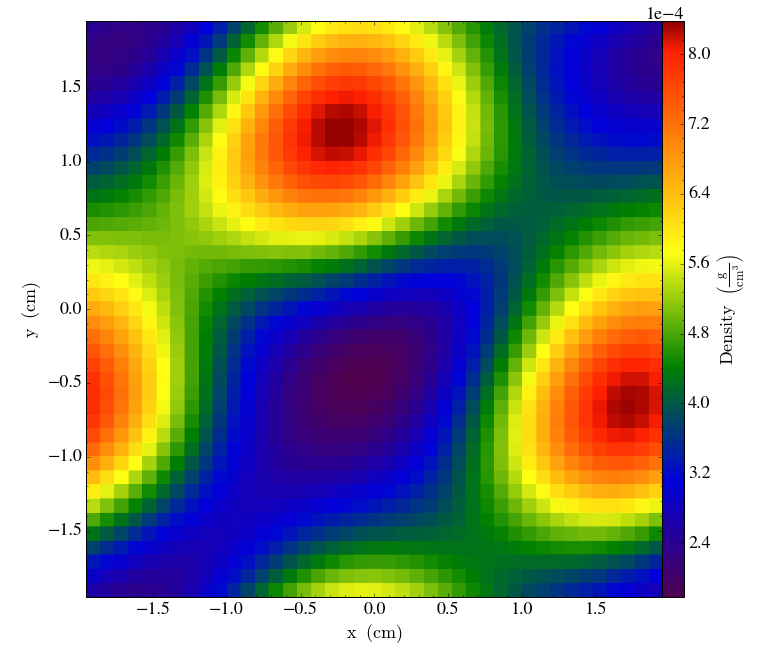

yt : [INFO     ] 2016-02-16 13:49:57,636 Saving plot phi_Slice_z_density.png


In [24]:
import yt
We3.show_potential_with_yt(N_layer=5, alpha_norm=1.0, cmap='BrBG', Proj=0, Slice=1, gifmaking=0, show3D=0)

In [219]:
#Test if the ay we get have the right properties to make real fields 
print We.ay[0:3]
print We.ay[3:8]
print We.ay[8:15]

[-0.00441677+0.10035718j  0.00402008+0.j          0.00441677+0.10035718j]
[-0.01531818-0.20065277j -0.00797179-0.05138507j -0.14740220+0.j
  0.00797179-0.05138507j -0.01531818+0.20065277j]
[ 0.02524422+0.02341999j  0.12005129-0.20492753j  0.00977705-0.09913382j
 -0.12228090+0.j         -0.00977705-0.09913382j  0.12005129+0.20492753j
 -0.02524422+0.02341999j]


We do have $a_{lm} = (-1)^m * a_{lm}^\dagger$ , so they will give a real map and we won't throw out any info in building self.alm

# Test 1: Recovering the $a_y$'s from T maps
What if we tried to recover the $a_y$ vector from reading these maps?

In [220]:
We.decompose_T_map_into_spherical_harmonics(lmax=10)
ay_recovered=We.alm2ay()
print ay_recovered[0:3]
print ay_recovered[3:8]
print ay_recovered[8:15]

[-0.00441677+0.10035718j  0.00402008+0.j          0.00441677+0.10035718j]
[-0.01531818-0.20065277j -0.00797179-0.05138507j -0.14740220+0.j
  0.00797179-0.05138507j -0.01531818+0.20065277j]
[ 0.02524422+0.02341999j  0.12005129-0.20492753j  0.00977705-0.09913382j
 -0.12228090+0.j         -0.00977705-0.09913382j  0.12005129+0.20492753j
 -0.02524422+0.02341999j]


In [83]:
print We.ay[0:3]
print We.ay[3:8]
print We.ay[8:15]

[ -7.66306774e-05-0.50246556j  -6.29698337e-01+0.j
   7.66306774e-05-0.50246556j]
[  4.06621974e-01+0.29868932j   3.68875701e-04-0.06779229j
  -7.47922467e-02+0.j          -3.68875701e-04-0.06779229j
   4.06621974e-01-0.29868932j]
[  4.37985215e-04-0.10695991j   2.61268342e-01+0.18807955j
   1.69630944e-04+0.09046586j   1.29260450e-01+0.j
  -1.69630944e-04+0.09046586j   2.61268342e-01-0.18807955j
  -4.37985215e-04-0.10695991j]


And it works!!! Let's try to plot it to make sure they all match:

In [232]:
pltxaxislim=max(np.absolute(We.alm.real))+0.1
pltyaxislim=max(np.absolute(We.alm.imag))+0.1

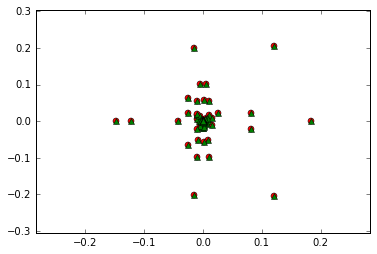

In [233]:
import matplotlib.pyplot as plt
plt.plot(We.ay.real, We.ay.imag, 'ro', ay_recovered.real, ay_recovered.imag, 'g^')
plt.axis([-pltxaxislim , pltxaxislim, -pltyaxislim, pltyaxislim])
plt.show()

# Test 2: Reconstructing the $T$ map from 3D samples of phi $\phi$
Lets reconstruct the Mollweide from Roger's data:

In [3]:
We4 = beatbox.Universe()

In [4]:
f_n, k_y, k_x, k_z= We4.load_mathematica_data()


In [5]:
print k_x.shape, k_y.shape, k_z.shape

(122,) (122,) (122,)


In [6]:
#In case we need n1, n2, n3 at some point...:
n1, n2, n3 = (k_x/(np.pi/2)).astype(int), (k_y/(np.pi/2)).astype(int), (k_z/(np.pi/2)).astype(int)
k_norm=np.sqrt(k_x**2+k_y**2+k_z**2)
k, theta, phi = k_norm[:61], np.arctan2(k_y[:61],k_x[:61]), np.arccos(k_z[:61]/k_norm[:61])
theta[np.isnan(theta)] = np.pi/2.0

In [7]:
NY = (We4.truncated_lmax + 1)**2-(We4.truncated_lmin)**2
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
#    for the sin coefficients
NN = len(f_n)
R = np.zeros([NY,NN], dtype=np.complex128)

In [8]:
from scipy.special import sph_harm,sph_jn
lms=[(l, m) for l in range(We4.truncated_lmin,We4.truncated_lmax+1) for m in range(-l, l+1)]
# Get ready to loop over y
y=0
A=[sph_jn(We4.truncated_lmax,ki)[0] for ki in k]        
# Loop over y, computing elements of R_yn 
for i in lms:        
    l=i[0]
    m=i[1]

    trigpart = np.cos(np.pi*l/2.0)
    B=np.asarray([A[ki][l] for ki in range(len(k))])
            
    R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    R[y,-1:NN/2-1:-1] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y=y+1

In [9]:
ay=np.dot(R,f_n)
We4.ay=ay
# Reorganize a_y into a_lm
We4.ay2alm(ay, usedefault=1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


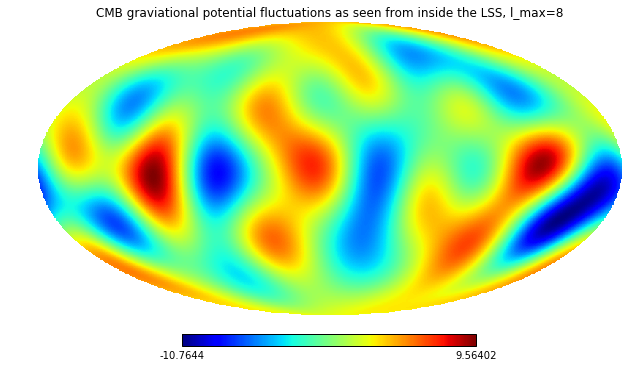

In [37]:
#We4.alm=-1*We4.alm
We4.show_CMB_T_map(from_perspective_of="observer")
np.savetxt( "data/Rogersay.txt", We4.ay.view(float))

In [39]:
R.shape

(80, 122)

This is exactly Fig 3 b from the proposal! Hurray!!

### Attempting to work only with real $a_y$'s do exactly like in the Allegro paper:

made it to put_alm!!
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


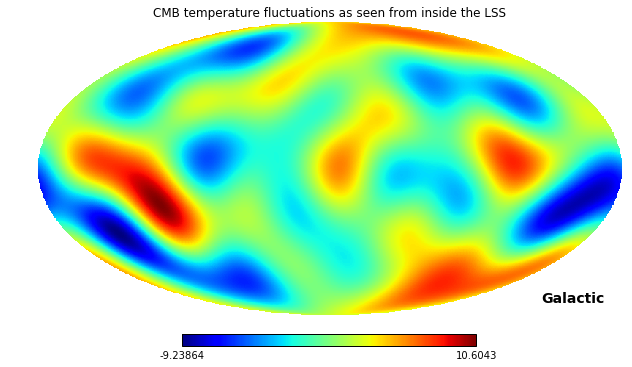

In [154]:
We5 = beatbox.Universe(truncated_nmax=3, truncated_nmin=0, truncated_lmax=8, truncated_lmin=0)
f_n, k_x, k_y, k_z= We5.load_mathematica_data()

#In case we need n1, n2, n3 at some point...:
n1, n2, n3 = (k_x/(np.pi/2)).astype(int), (k_y/(np.pi/2)).astype(int), (k_z/(np.pi/2)).astype(int)
k_norm=np.sqrt(k_x**2+k_y**2+k_z**2)
k, theta, phi = k_norm[:61], np.arctan2(k_y[:61],k_x[:61]), np.arccos(k_z[:61]/k_norm[:61])
theta[np.isnan(theta)] = np.pi/2.0

NY = (We5.truncated_lmax + 1)**2-(We5.truncated_lmin)**2
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
#    for the sin coefficients
NN = len(f_n)
R = np.zeros([NY,NN], dtype=np.complex128)

from scipy.special import sph_harm,sph_jn
lms=[(l, m) for l in range(We5.truncated_lmin,We5.truncated_lmax+1) for m in range(-l, l+1)]
# Get ready to loop over y
y=0
A=[sph_jn(We5.truncated_lmax,ki)[0] for ki in k]        
# Loop over y, computing elements of R_yn 
for i in lms:        
    l=i[0]
    m=i[1]
    # l,m = self.get_lm_from(y)
    #for n in range(NN):
        #if n < NN/2:
    trigpart = np.cos(np.pi*l/2.0)
    B=np.asarray([A[ki][l] for ki in range(len(k))])
            
    #print  trigpart,NN, self.R.shape, sph_harm(m,l,theta,phi).reshape(250).shape, np.asarray(B).shape
    #print [sph_jn(l,ki) for ki in k], A, np.asarray(A), k[0], l
    if m>0:
        R[y,:NN/2] = 4.0 * np.pi * 2**(0.5) * (-1)**m *(sph_harm(m,l,theta,phi).reshape(NN/2)).real*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * 2**(0.5) * (-1)**m * (sph_harm(m,l,theta,phi).reshape(NN/2)).real*B.reshape(NN/2)* trigpart
    elif m<0:
        R[y,:NN/2] = 4.0 * np.pi * 2**(0.5) * (-1)**m* (sph_harm(m,l,theta,phi).reshape(NN/2)).imag*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * 2**(0.5) * (-1)**m* (sph_harm(m,l,theta,phi).reshape(NN/2)).imag*B.reshape(NN/2)* trigpart
    elif m==0:
        R[y,:NN/2] = 4.0 * np.pi * (sph_harm(m,l,theta,phi).reshape(NN/2))*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * (sph_harm(m,l,theta,phi).reshape(NN/2))*B.reshape(NN/2)* trigpart
    

    y=y+1
    
ay=np.dot(R,f_n)
m=np.array([m[1] for m in lms])
        #Find the indices of the positive ms
pos_ind=(m>0)
        #Find the indices of the m=0
zero_ind=(m==0)
        #Find the indices of the negative ms
neg_ind=(m<0)
        
ay_complex=np.zeros(len(lms), dtype=np.complex128)
        
ay_complex[pos_ind]=np.array([(-1)**j for j in m[pos_ind]]) * (ay[pos_ind].astype(np.complex128)+1j*ay[neg_ind].astype(np.complex128))/2.**(0.5)
ay_complex[neg_ind]=(ay[pos_ind].astype(np.complex128)-1j*ay[neg_ind].astype(np.complex128))/2**(0.5)
ay_complex[zero_ind]=ay[zero_ind].astype(np.complex128)
        
We5.ay=ay_complex
# Reorganize a_y into a_lm
We5.ay2alm(ay_complex, usedefault=1)

#We5.alm=-1*We5.alm
We5.show_CMB_T_map(from_perspective_of="observer")

This doesn't really quite work, bet let's move on since the code with the complex $a_y$'s works fine

## Independent test: Fourier transform the $f_n$'s to real space, cut manually a sphere of radius $=1$, and do a Mollweider projection

In [155]:
We6 = beatbox.Universe(truncated_nmax=3, truncated_nmin=0, truncated_lmax=8, truncated_lmin=0)
f_n, k_x, k_y, k_z= We6.load_mathematica_data()

In [156]:
x,y,z=np.mgrid[-2:2:401*1j,-2:2:401*1j,-2:2:401*1j]
RealPhi = np.zeros(x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * x + k_y[i] * y + k_z[i] * z
    RealPhi += (f_n[i] * np.cos(phase)+f_n[len(k_x)-1-i]*np.sin(phase))*We6.Deltak**3


### Test that the manual Fourier transform works with a constant in Fourier space:

In [282]:
f_n_test=np.ones(len(f_n))

In [129]:

RealPhi_test = np.zeros(We6.x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * We6.x + k_y[i] * We6.y + k_z[i] * We6.z
    RealPhi_test += (f_n_test[i] * np.cos(phase)+f_n_test[len(k_x)-1-i]*np.sin(phase))*We6.Deltak**3
We6.phi=RealPhi_test.real


yt : [INFO     ] 2015-12-16 15:15:05,249 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-12-16 15:15:05,250 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-12-16 15:15:05,251 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2015-12-16 15:15:05,252 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2015-12-16 15:15:05,253 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-12-16 15:15:05,290 Loading field plugins.
yt : [INFO     ] 2015-12-16 15:15:05,291 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,292 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,294 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,296 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,298 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,299 Loaded geometric (112 ne

Extrema of ds phi: 0.0 613.022321203 167.180120434 g/cm**3 613.022321203 g/cm**3


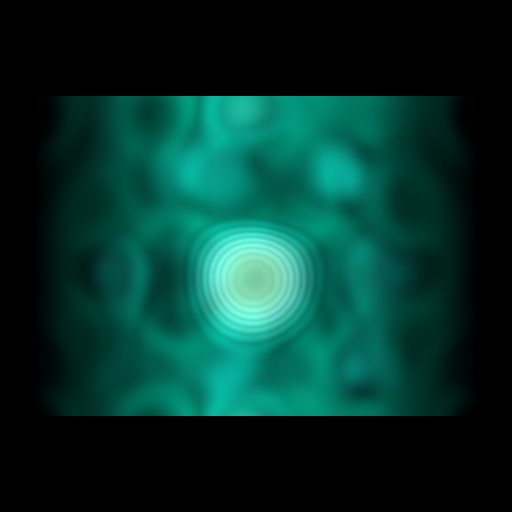

In [138]:
We6.show_potential_with_yt(angle=np.pi/2,  N_layer=10, cmap='BrBG', show3D=1)

Seems like a proper approximation of a delta function, so all good! 

### Move on to the actual data

In [157]:
We6.phi=RealPhi.real

yt : [INFO     ] 2015-12-17 21:44:42,501 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-12-17 21:44:42,502 Parameters: domain_dimensions         = [401 401 401]
yt : [INFO     ] 2015-12-17 21:44:42,504 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2015-12-17 21:44:42,504 Parameters: domain_right_edge         = [ 2.  2.  2.]
yt : [INFO     ] 2015-12-17 21:44:42,505 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-12-17 21:44:42,692 Loading field plugins.
yt : [INFO     ] 2015-12-17 21:44:42,692 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,693 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,693 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,694 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,696 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,697 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-12-17 21:44:4


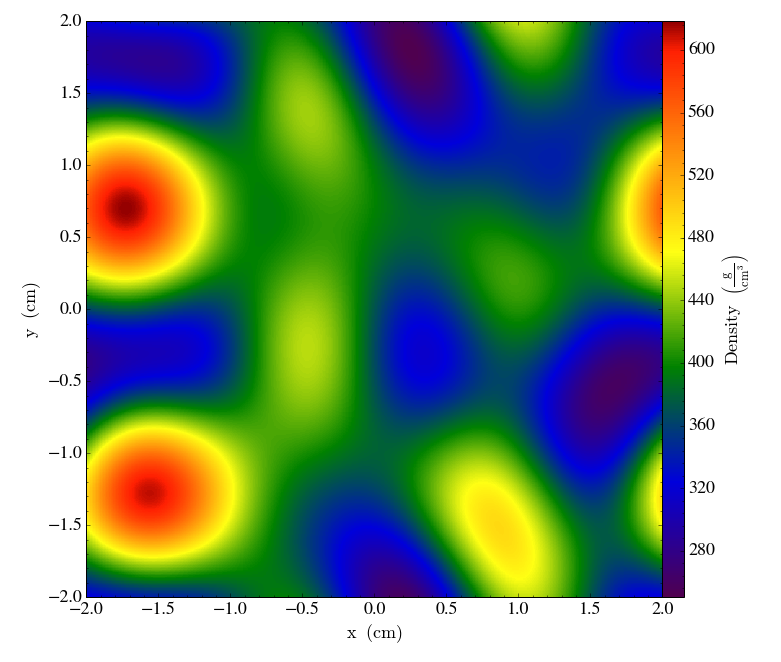

yt : [INFO     ] 2015-12-17 21:45:21,354 Saving plot phi_Slice_z_density.png


In [158]:
We6.show_potential_with_yt(0,  N_layer=10, cmap='BrBG',show3D=0, Slice=1)

And this is exactly Figure 3a from the proposal! Yay!


To do the projection, cut the x=1 sphere and project using a Mollweider projection

In [159]:
x_vec=np.sqrt(x**2+y**2+z**2)
unit_norm_ind=(x_vec==1)
#unit_norm_ind_upper=(x_vec<1.01)
#unit_norm_ind_lower=(0.99<x_vec)
#unit_norm_ind=unit_norm_ind_upper*unit_norm_ind_lower

In [160]:
polar_theta, polar_phi=np.arctan2(y[unit_norm_ind], x[unit_norm_ind]), np.arccos(z[unit_norm_ind]/x_vec[unit_norm_ind])
polar_theta[np.isnan(polar_theta)] = np.pi/2.0

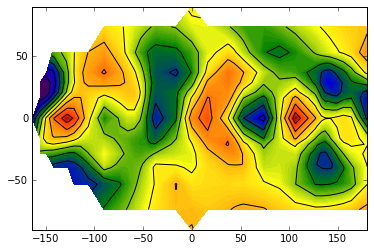

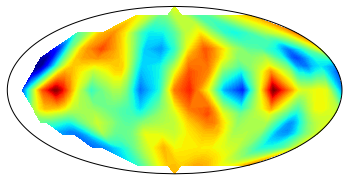

In [161]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Z=np.zeros(len(We6.phi[unit_norm_ind]))
Z = We6.phi[unit_norm_ind]

points=np.zeros((len(polar_theta),2))
points[:,0]=polar_theta
points[:,1]=polar_phi
from scipy.interpolate import griddata
utheta,uphi=np.unique(polar_theta), np.unique(polar_phi)
phiphi,thetatheta=np.meshgrid(utheta,uphi)
ZZ= griddata(points, Z.reshape(len(Z)), (phiphi,thetatheta), method='cubic')

plt.figure()
ax = plt.subplot(111)#, projection='mollweide')
ax.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,100)
ax.contour((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,10,colors='k')

plt.show()

m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(phiphi,thetatheta, ZZ, 10, colors='k',latlon=True)
m.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

And this works!! Yay!